# Pymaceuticals Inc.
---

### Analysis

    This script uses a merged dataset of mice subjects and their study results to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

    The data was cleaned to remove multiple rows with the same “Mouse ID” and “Timepoint”, with mouse “g989” being the main culprit.
    
    The mice that seemed to have lower final tumor volume tended to use Capomulin and Ramicane.  As seen in the box plot both their averages were under 40 mm3.  Meanwhile the mice that seemed to have higher tumor volume tended to use Infubinol and Ceftamin.  As seen in the box plot both their averages were close to 60 mm3.  An outlier for the Infubinol treatment was found in both the box plot and the quartile calculations.  Mouse ID “c326” had a final volume that was under 40 mm3.  This outlier could mean further study of these drugs may be needed to provide a better insight.

    There is a strong correlation between Mouse Weight and Average Tumor Volume with a ration of 0.84.  This type of correlation could explain the multiple ranges of weights found in the boxplot for each treatment.  A heavier mouse will tend to keep a heavier final tumor volume.

     The data shows that the treatment with Capomulin shows strong potential in lowering the tumor volume of their mice subjects.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')


# Display the data table for preview

selected_columns = [
    'Mouse ID',
    'Timepoint',
    'Tumor Volume (mm3)',
    'Metastatic Sites',
    'Drug Regimen',
    'Sex',
    'Age_months',
    'Weight (g)'
]

new_table = combined_data[selected_columns]

new_table.head(32)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [42]:
# Checking the number of mice.
num_mice = len(new_table['Mouse ID'].unique())
print(f'The number of mice in the dataset is: {num_mice}')

The number of mice in the dataset is: 249


In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = new_table[new_table.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique duplicate 'Mouse ID'
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 

# Get all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data = new_table[new_table['Mouse ID'] == 'g989']

# Display the data for the duplicate mouse ID
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_table[new_table['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [46]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df['Mouse ID'].unique())
num_mice_clean

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [48]:
# Group the clean DataFrame by 'Drug Regimen'
grouped_df = clean_df.groupby('Drug Regimen')

# Calculate the required summary statistics for tumor volume
summary_df = grouped_df.agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename the columns to match the specified headers
summary_df.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary DataFrame
print("Summary Statistics Table:")
summary_df

Summary Statistics Table:


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

In [50]:
# Using the aggregation method to generate the summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

# Rename the columns to match the specified order
summary_df.columns = ['Drug Regimen', 'mean', 'median', 'var', 'std', 'sem']

# Display the summary DataFrame
summary_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


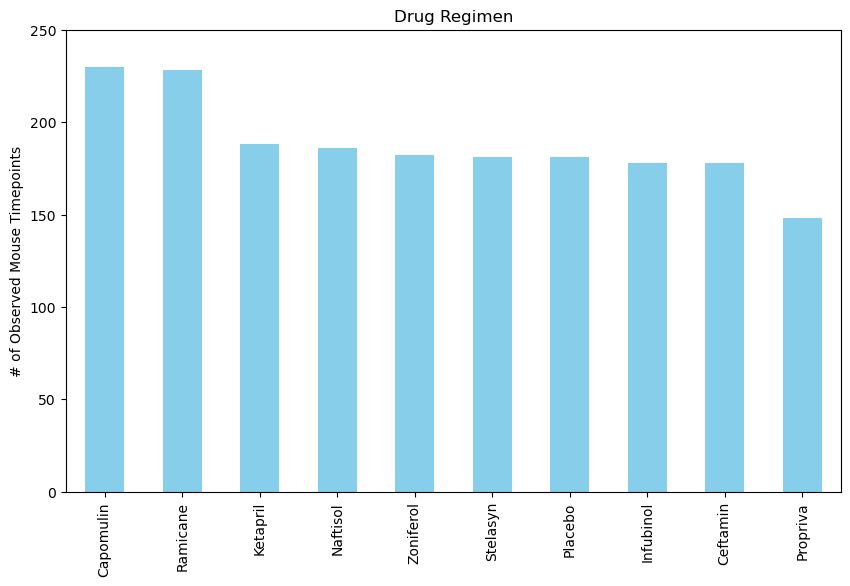

In [52]:
# Group the clean DataFrame by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
ax = drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set the title and labels
ax.set_title("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_yticks(range(0, max(drug_regimen_counts) + 50, 50))  # Adjust y-axis ticks based on the maximum count

# Show the plot
plt.show()



In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

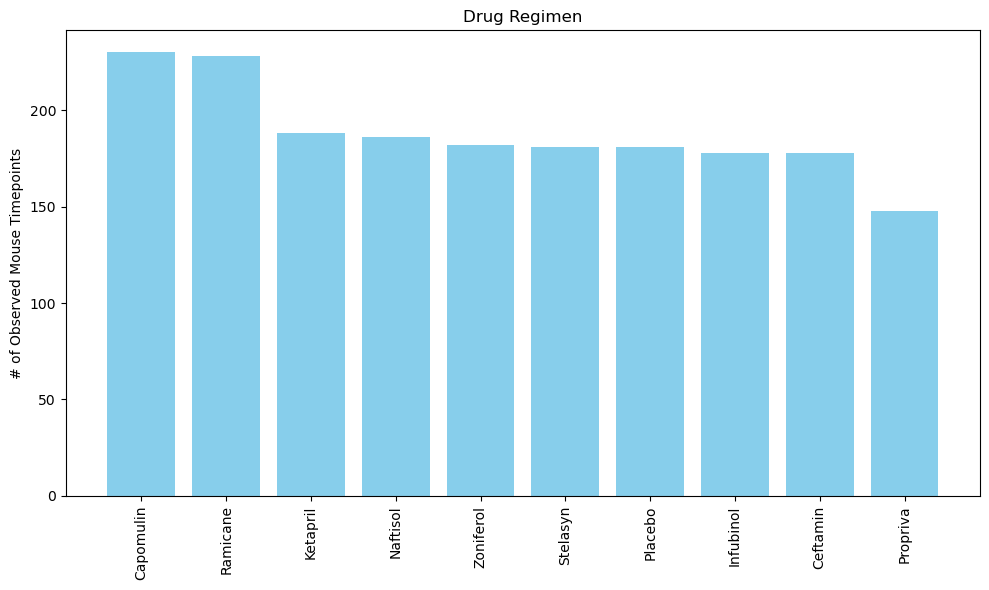

In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Group the clean DataFrame by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')

# Set the title and labels
plt.title("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


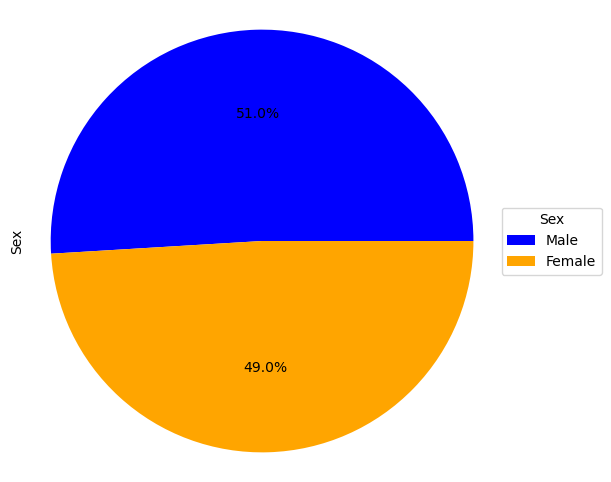

In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Group the clean DataFrame by 'Sex' and count the number of unique Mouse IDs for each group
sex_counts = clean_df['Sex'].value_counts()

# Create a pie plot using Pandas
colors = ['blue', 'orange']
sex_pie = sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), labels=None)



# Add a legend with labels ('Male' and 'Female') on the side
plt.legend(labels=sex_counts.index, title="Sex", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


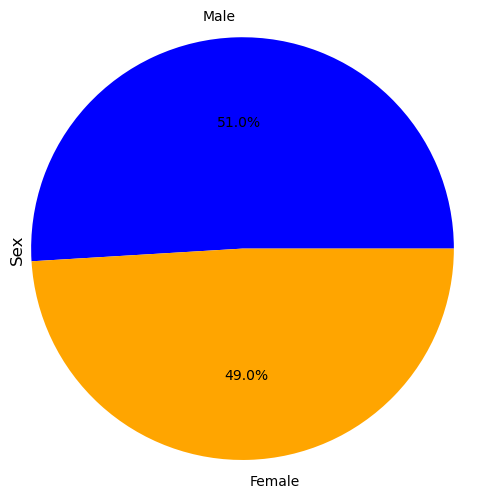

In [58]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Group the clean DataFrame by 'Sex' and count the number of unique Mouse IDs for each group
sex_counts = clean_df['Sex'].value_counts()

# Define colors for the pie chart
colors = ['blue', 'orange']

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors)

# Add the "Sex" label on the side
plt.annotate("Sex", xy=(-1.1, 0), fontsize=12, rotation=90, va='center', color='black')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()



## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [60]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the desired treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(desired_regimens)]

# Display the DataFrame with final tumor volumes for the selected treatment regimens
final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume_df.head(31)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
10,a520,45,38.810366,1,Ramicane,Male,13,21
11,a577,30,57.031862,2,Infubinol,Female,6,25
12,a644,45,32.978522,1,Ramicane,Female,7,17
13,a685,45,66.083066,3,Infubinol,Male,8,30
19,b128,45,38.982878,2,Capomulin,Female,9,22


In [61]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [62]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    if not potential_outliers.empty:
        print(f"{treatment}'s potential outlier row and value: {potential_outliers}")
    else:
        print(f"{treatment} has no potential outliers.")



Capomulin has no potential outliers.
Ramicane has no potential outliers.
Infubinol's potential outlier row and value: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has no potential outliers.


In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

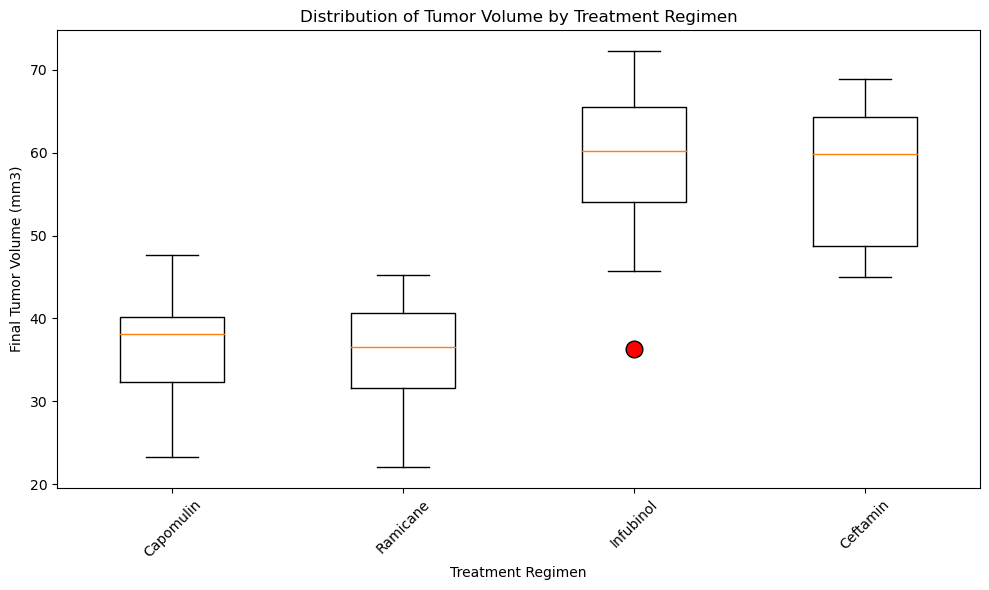

In [64]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a list to store tumor volume data for each treatment group
data = [tumor_vol_data[0], tumor_vol_data[1], tumor_vol_data[2], tumor_vol_data[3]]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments, flierprops={'markerfacecolor': 'red', 'markersize': 12})

# Set the title and labels
plt.title("Distribution of Tumor Volume by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Line and Scatter Plots

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

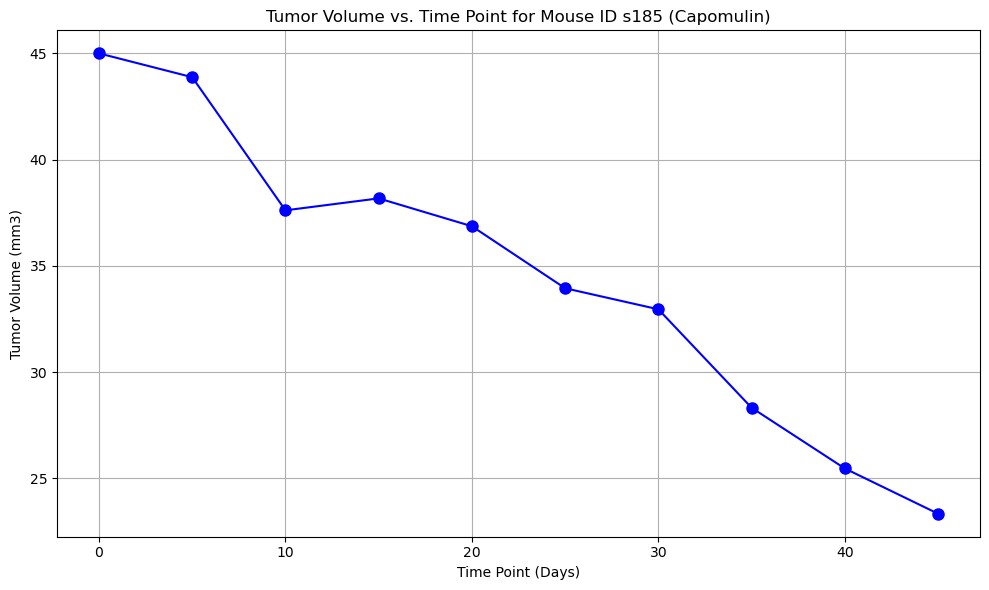

In [66]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the "clean_df" DataFrame for mouse 's185' treated with 'Capomulin'
mouse_id = 's185'
treatment_regimen = 'Capomulin'

# Filter the data for the selected mouse and treatment regimen
selected_mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == treatment_regimen)]

# Check if data for the selected mouse and treatment exist
if selected_mouse_data.empty:
    print(f"No data found for Mouse ID {mouse_id} and Treatment Regimen {treatment_regimen}. Please verify the data.")
else:
    # Extract time points and tumor volumes
    timepoints = selected_mouse_data['Timepoint']
    tumor_volumes = selected_mouse_data['Tumor Volume (mm3)']

    # Create a line plot with a line connecting the points
    plt.figure(figsize=(10, 6))
    plt.plot(timepoints, tumor_volumes, marker='o', color='blue', markersize=8, linestyle='-')

    # Set the title and labels
    plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} ({treatment_regimen})")
    plt.xlabel("Time Point (Days)")
    plt.ylabel("Tumor Volume (mm3)")

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

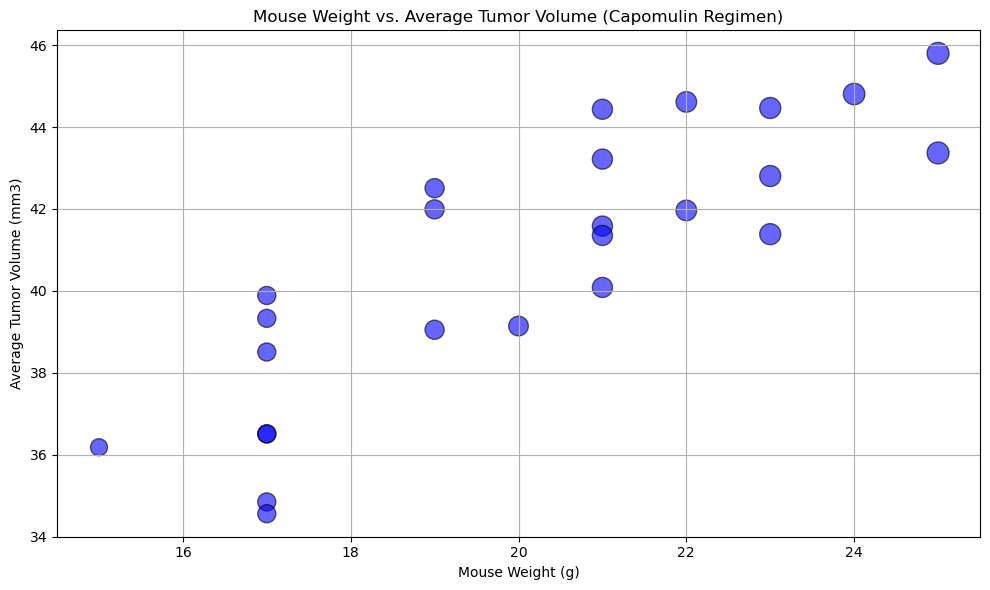

In [68]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the "clean_df" DataFrame to select data for the 'Capomulin' regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weight*10, alpha=0.6)

# Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Correlation between Mouse Weight and Average Tumor Volume: 0.84


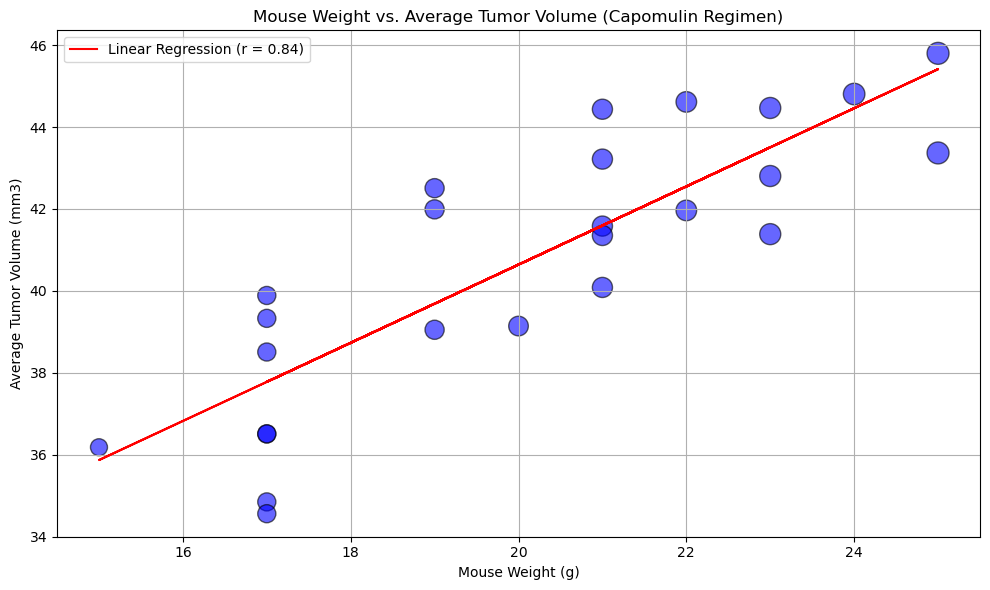

In [70]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the "clean_df" DataFrame to select data for the 'Capomulin' regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = round(average_tumor_volume.corr(mouse_weight), 2)

# Display the correlation coefficient
print(f"Correlation between Mouse Weight and Average Tumor Volume: {correlation_coefficient}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weight*10, alpha=0.6)

# Perform linear regression to fit a line to the data points
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

# Plot the regression line
plt.plot(mouse_weight, regress_values, 'r-', label=f"Linear Regression (r = {correlation_coefficient})")

# Set the title, xlabel, ylabel, and legend
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
